In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [148]:
# Load the dataset
df = pd.read_csv('data_science_job.csv')

In [149]:
df = df.drop(columns=['enrollee_id', 'city_development_index', 'experience', 'training_hours'])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 19158 non-null  object 
 1   gender               14650 non-null  object 
 2   relevent_experience  19158 non-null  object 
 3   enrolled_university  18772 non-null  object 
 4   education_level      18698 non-null  object 
 5   major_discipline     16345 non-null  object 
 6   company_size         13220 non-null  object 
 7   company_type         13018 non-null  object 
 8   target               19158 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [151]:
df.isnull().mean() * 100

city                    0.000000
gender                 23.530640
relevent_experience     0.000000
enrolled_university     2.014824
education_level         2.401086
major_discipline       14.683161
company_size           30.994885
company_type           32.049274
target                  0.000000
dtype: float64

<AxesSubplot:>

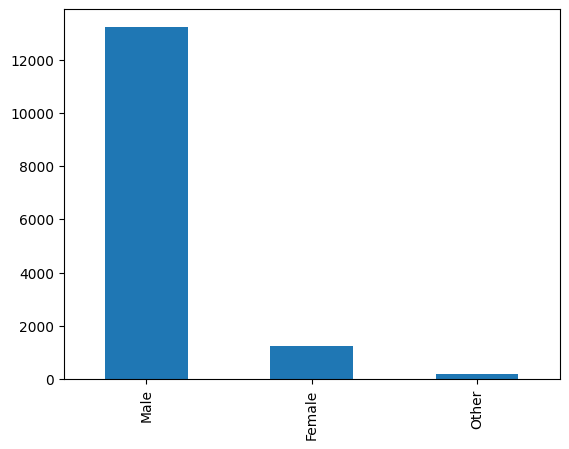

In [152]:
df['gender'].value_counts().plot(kind='bar')

In [153]:
df['gender'].mode()

0    Male
dtype: object

Text(0.5, 1.0, 'gender')

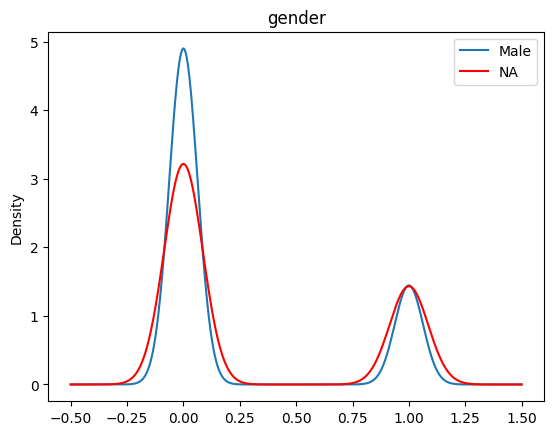

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['gender']=='Male']['target'].plot(kind='kde', ax=ax)

df[df['gender'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Male', 'NA']
ax.legend(lines, labels, loc='best')

plt.title('gender')

In [155]:
temp = df[df['gender']=='Male']['target']
df['gender'].fillna('Male', inplace=True)

<AxesSubplot:>

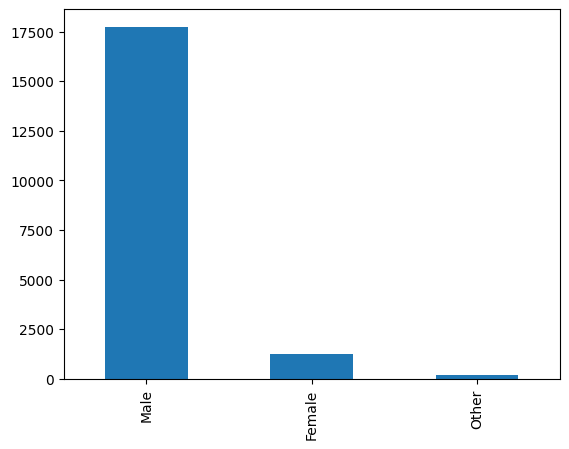

In [156]:
df['gender'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'gender')

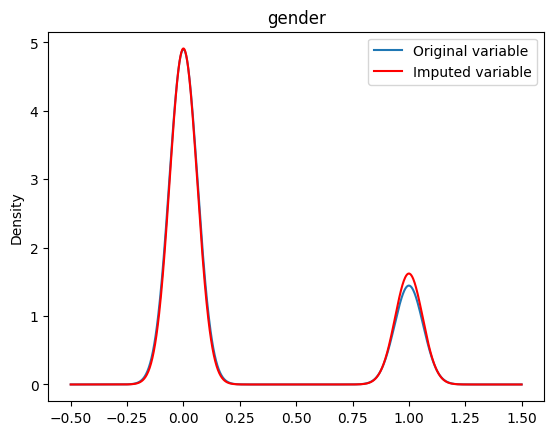

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['gender'] == 'Male']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('gender')

<AxesSubplot:>

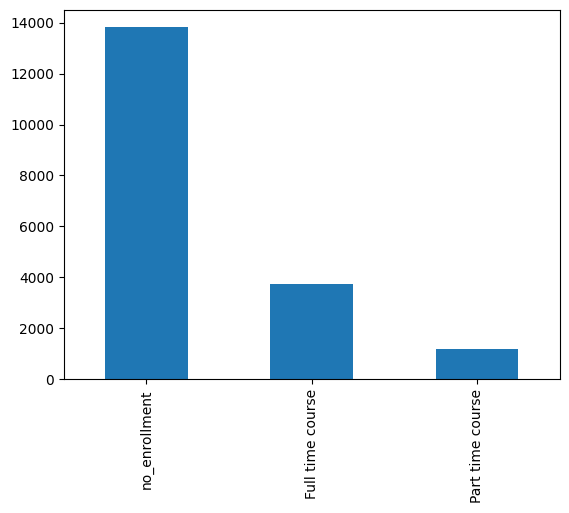

In [158]:
df['enrolled_university'].value_counts().plot(kind='bar')

In [159]:
df['enrolled_university'].mode()

0    no_enrollment
dtype: object

Text(0.5, 1.0, 'enrolled_university')

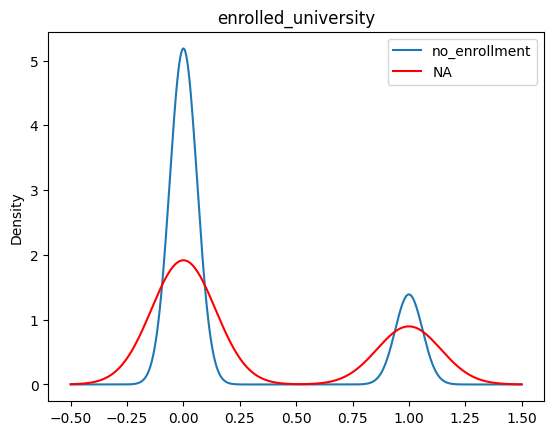

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['enrolled_university']=='no_enrollment']['target'].plot(kind='kde', ax=ax)

df[df['enrolled_university'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['no_enrollment', 'NA']
ax.legend(lines, labels, loc='best')

plt.title('enrolled_university')

In [161]:
temp = df[df['enrolled_university']=='no_enrollment']['target']
df['enrolled_university'].fillna('no_enrollment', inplace=True)

<AxesSubplot:>

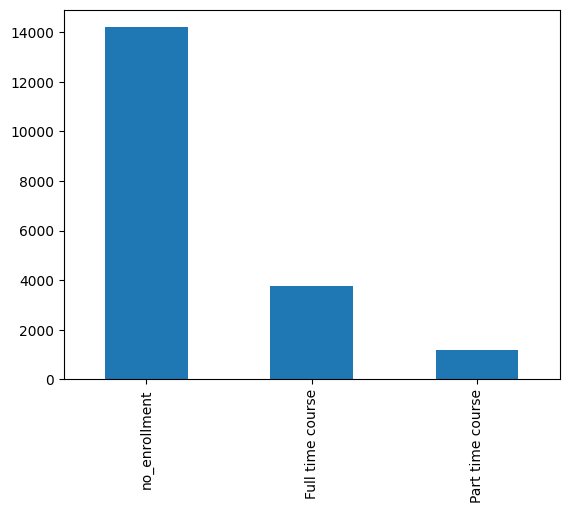

In [162]:
df['enrolled_university'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'enrolled_university')

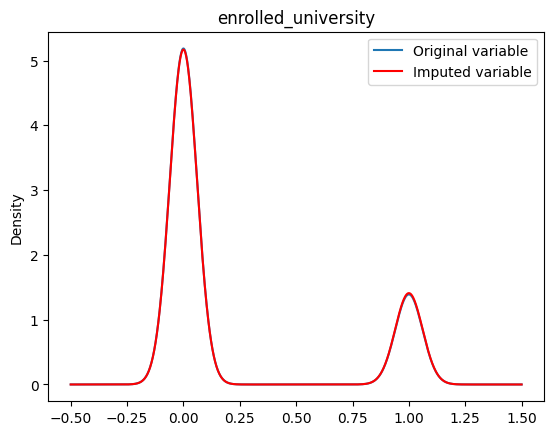

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['enrolled_university'] == 'no_enrollment']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('enrolled_university')

<AxesSubplot:>

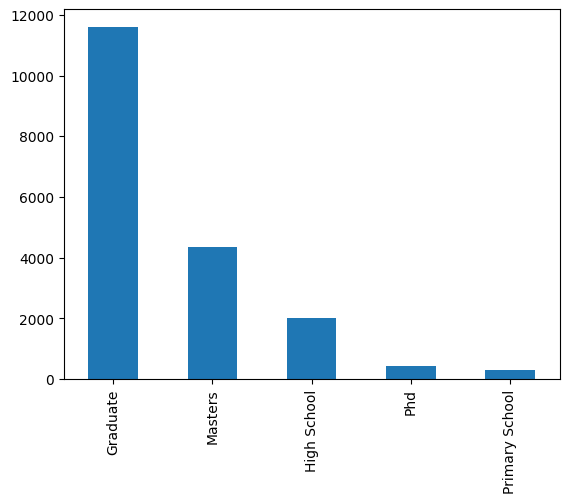

In [164]:
df['education_level'].value_counts().plot(kind='bar')

In [165]:
df['education_level'].mode()

0    Graduate
dtype: object

Text(0.5, 1.0, 'education_level')

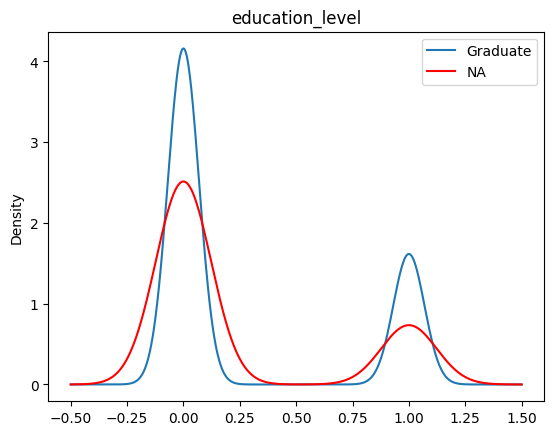

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['education_level']=='Graduate']['target'].plot(kind='kde', ax=ax)

df[df['education_level'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Graduate', 'NA']
ax.legend(lines, labels, loc='best')

plt.title('education_level')

In [167]:
temp = df[df['education_level']=='Graduate']['target']
df['education_level'].fillna('Graduate', inplace=True)

<AxesSubplot:>

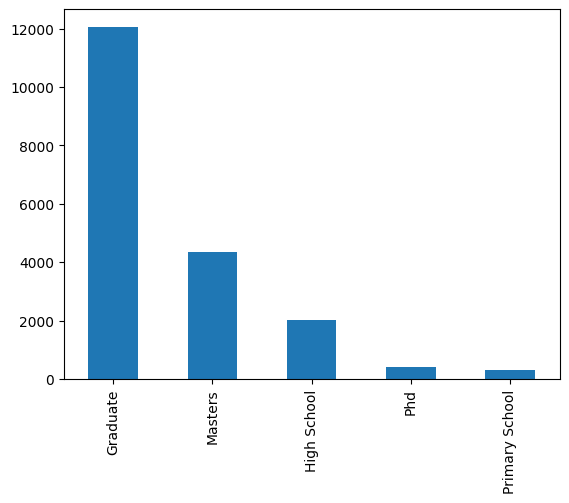

In [168]:
df['education_level'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'enrolled_university')

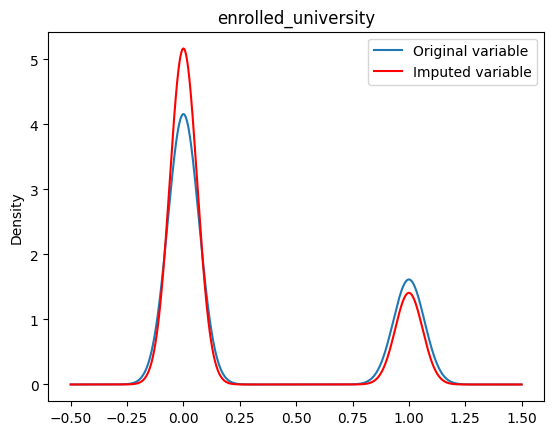

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['enrolled_university'] == 'no_enrollment']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('enrolled_university')

<AxesSubplot:>

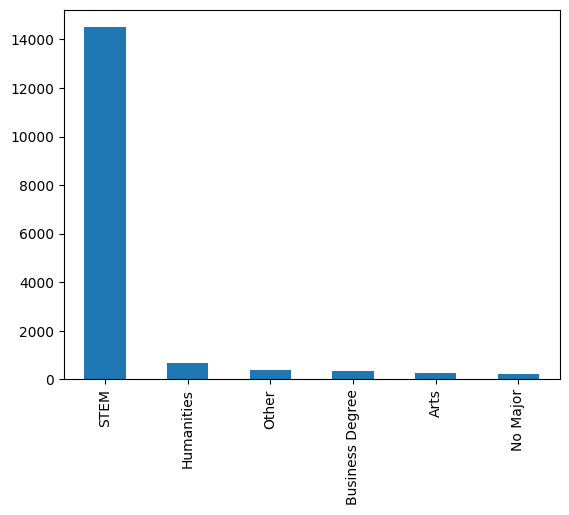

In [170]:
df['major_discipline'].value_counts().plot(kind='bar')

In [171]:
df['major_discipline'].mode()

0    STEM
dtype: object

Text(0.5, 1.0, 'major_discipline')

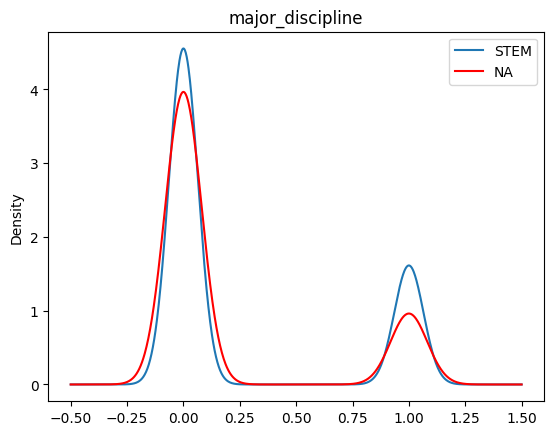

In [172]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['major_discipline']=='STEM']['target'].plot(kind='kde', ax=ax)

df[df['major_discipline'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['STEM', 'NA']
ax.legend(lines, labels, loc='best')

plt.title('major_discipline')

In [173]:
temp = df[df['major_discipline']=='STEM']['target']
df['major_discipline'].fillna('STEM', inplace=True)

<AxesSubplot:>

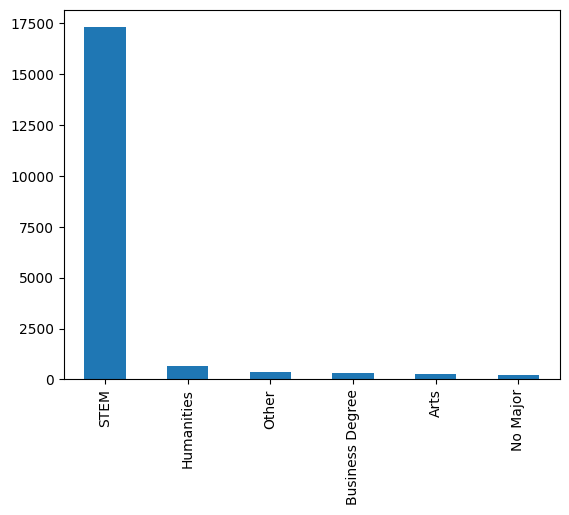

In [174]:
df['major_discipline'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'major_discipline')

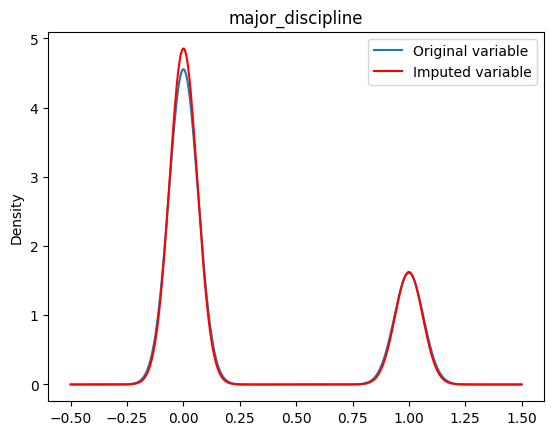

In [175]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['major_discipline'] == 'STEM']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('major_discipline')

<AxesSubplot:>

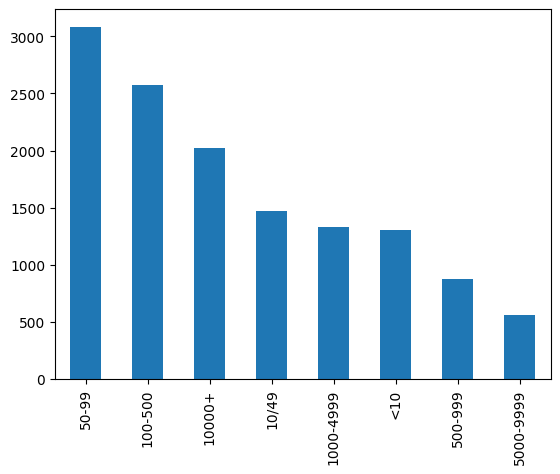

In [176]:
df['company_size'].value_counts().plot(kind='bar')

In [177]:
df['company_size'].mode()

0    50-99
dtype: object

Text(0.5, 1.0, 'company_size')

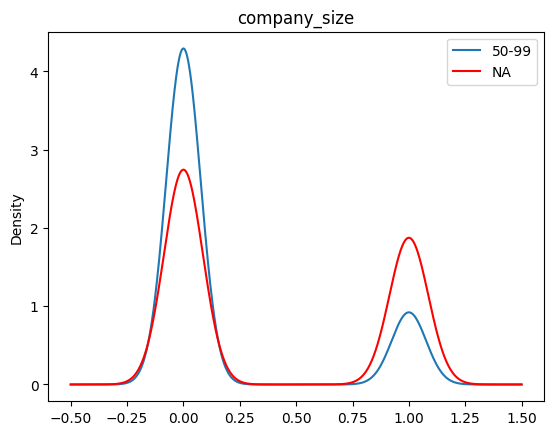

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['company_size']=='50-99']['target'].plot(kind='kde', ax=ax)

df[df['company_size'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['50-99', 'NA']
ax.legend(lines, labels, loc='best')

plt.title('company_size')

In [179]:
temp = df[df['company_size']=='50-99']['target']
df['company_size'].fillna('50-99', inplace=True)

<AxesSubplot:>

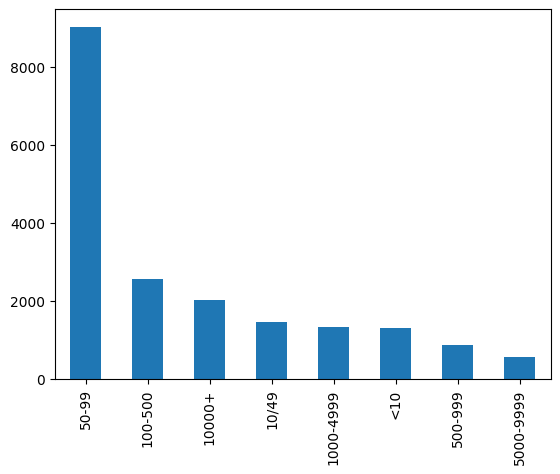

In [180]:
df['company_size'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'company_size')

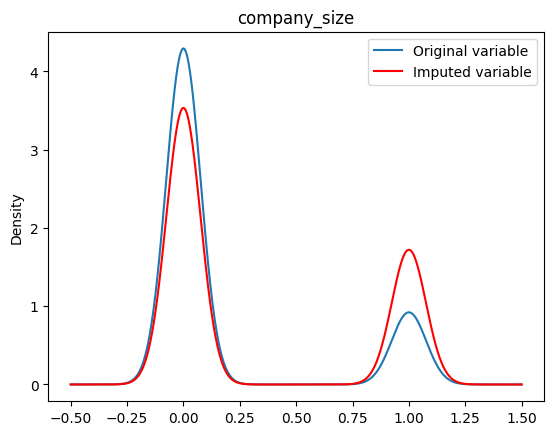

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['company_size'] == '50-99']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('company_size')

<AxesSubplot:>

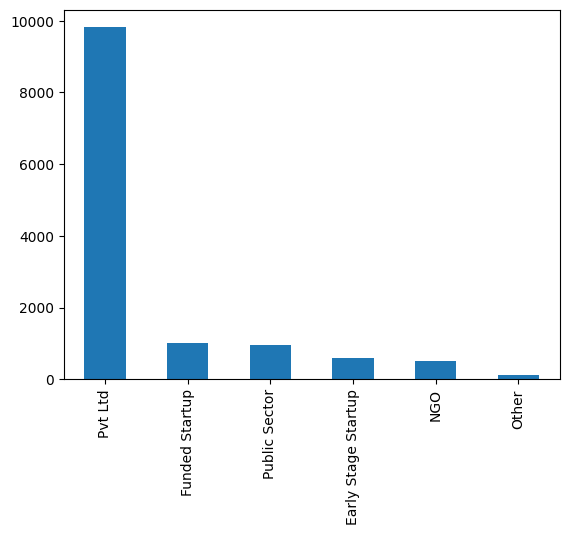

In [182]:
df['company_type'].value_counts().plot(kind='bar')

In [183]:
df['company_type'].mode()

0    Pvt Ltd
dtype: object

Text(0.5, 1.0, 'company_type')

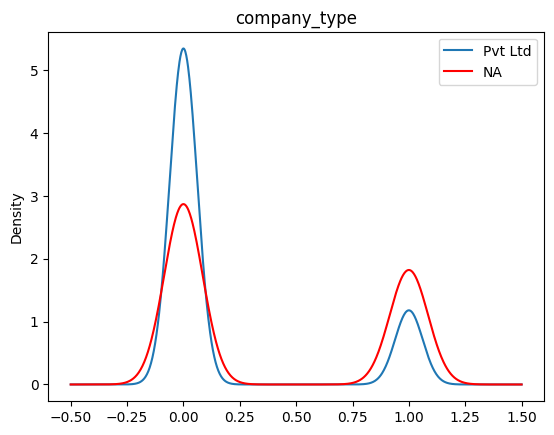

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['company_type']=='Pvt Ltd']['target'].plot(kind='kde', ax=ax)

df[df['company_type'].isnull()]['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Pvt Ltd', 'NA']
ax.legend(lines, labels, loc='best')

plt.title('company_type')

In [185]:
temp = df[df['company_type']=='Pvt Ltd']['target']
df['company_type'].fillna('Pvt Ltd', inplace=True)

<AxesSubplot:>

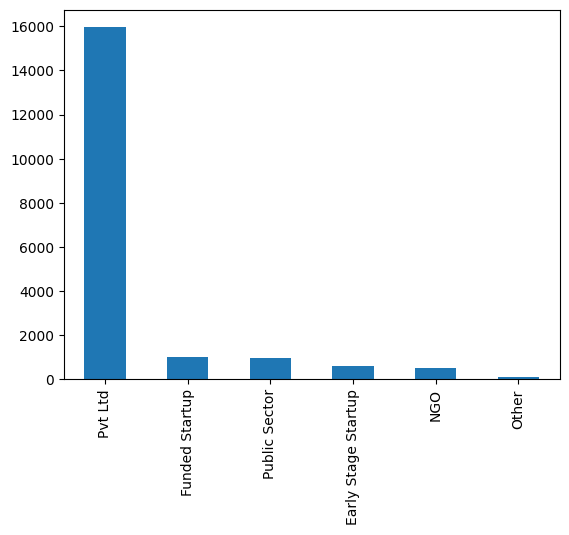

In [186]:
df['company_type'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'company_type')

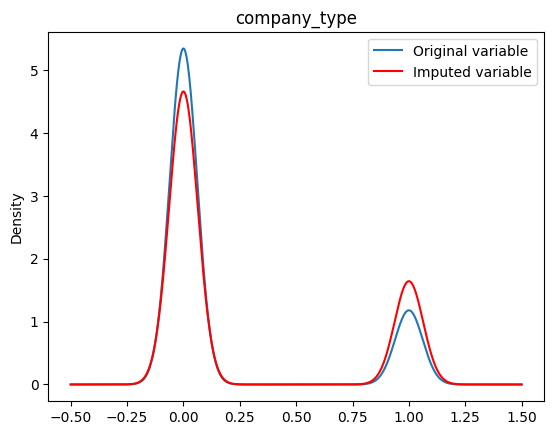

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['company_type'] == 'Pvt Ltd']['target'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('company_type')

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [189]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['gender'] = le.fit_transform(df['gender'])
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])
df

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,target
0,5,1,0,2,0,5,4,5,1.0
1,77,1,1,2,0,5,4,5,0.0
2,64,1,1,0,0,5,4,5,0.0
3,14,1,1,2,0,1,4,5,1.0
4,50,1,0,2,2,5,4,1,0.0
...,...,...,...,...,...,...,...,...,...
19153,55,1,1,2,0,2,4,5,1.0
19154,5,1,0,2,0,5,4,5,1.0
19155,5,1,0,2,0,5,4,5,0.0
19156,94,1,0,2,1,5,5,5,0.0


In [190]:
X = df.drop(columns=['target'])
y = df['target']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((15326, 8), (3832, 8))

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


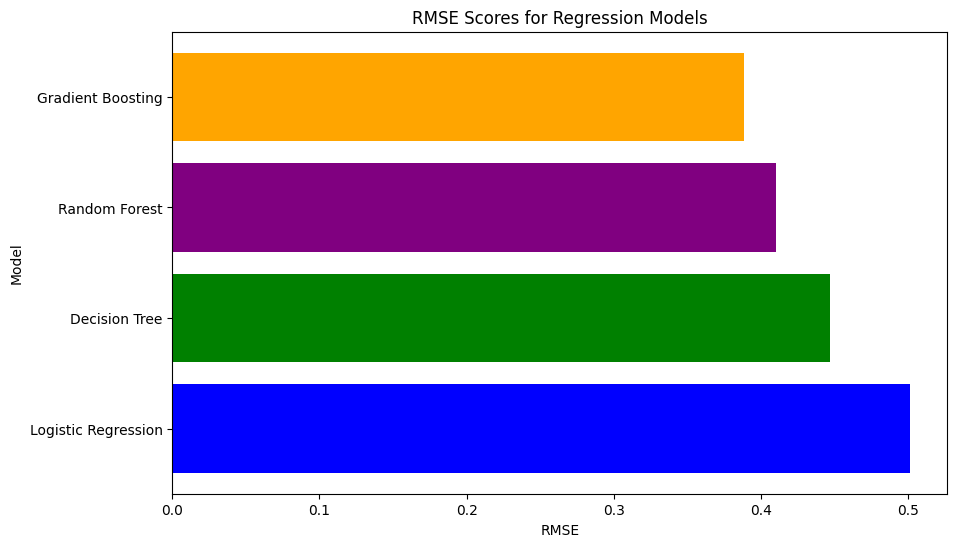

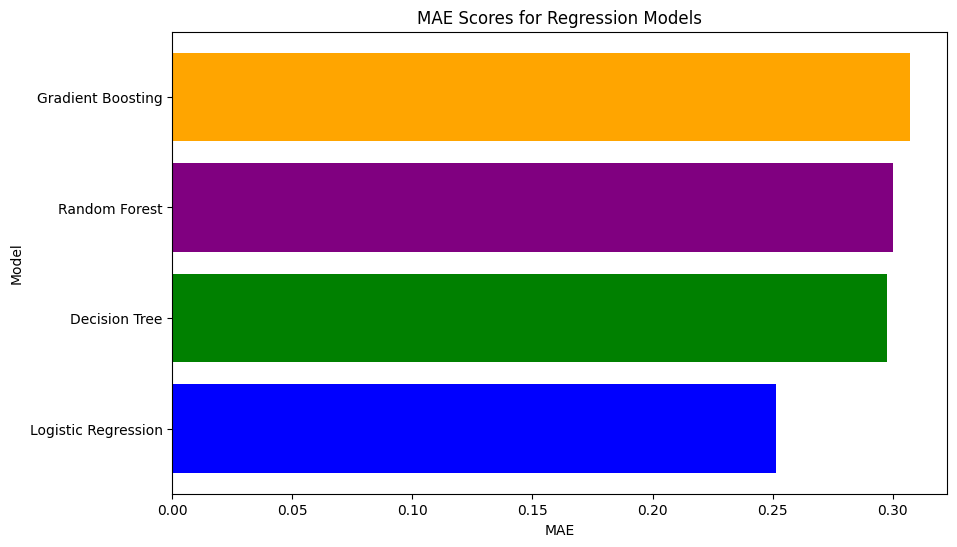

In [193]:
# Initialize lists to store evaluation metrics
model_names = []
rmse_scores = []
mae_scores = []

# Train and Evaluate Regression Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    model_names.append(model_name)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Create bar plots for RMSE scores with unique colors
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'purple', 'orange']
plt.barh(model_names, rmse_scores, color=colors)
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('RMSE Scores for Regression Models')
plt.show()

# Create bar plots for MAE scores with unique colors
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'purple', 'orange']
plt.barh(model_names, mae_scores, color=colors)
plt.xlabel('MAE')
plt.ylabel('Model')
plt.title('MAE Scores for Regression Models')
plt.show()